In [67]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNBasic, SVD
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("ratings_small.csv")

In [69]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()
print(min_rating, max_rating)

0.5 5.0


In [70]:
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [71]:
partc_metrics = {}

In [72]:
sim_options = {'user_based': True}
userbased_cf = KNNBasic(sim_options=sim_options)
temp = cross_validate(userbased_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9667  0.9691  0.9712  0.9647  0.9632  0.9670  0.0029  
MAE (testset)     0.7431  0.7437  0.7482  0.7408  0.7416  0.7435  0.0026  
Fit time          0.25    0.37    0.30    0.21    0.26    0.28    0.05    
Test time         1.55    2.79    1.32    1.15    1.22    1.61    0.61    


In [73]:
rmse_ubcf = np.mean(temp['test_rmse'])
mae_ubcf = np.mean(temp['test_mae'])
partc_metrics['User-Based Collaboartive Filtering'] = (rmse_ubcf,mae_ubcf)

In [74]:
sim_options = {"user_based": False}
itembased_cf = KNNBasic(sim_options=sim_options)
temp2 = cross_validate(itembased_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9371  0.9209  0.9427  0.9405  0.9348  0.9352  0.0076  
MAE (testset)     0.7221  0.7116  0.7275  0.7239  0.7223  0.7215  0.0053  
Fit time          5.47    5.34    5.13    4.86    5.32    5.22    0.22    
Test time         6.56    6.46    6.35    7.08    8.12    6.91    0.65    


In [75]:
rmse_ibcf = np.mean(temp2['test_rmse'])
mae_ibcf = np.mean(temp2['test_mae'])
partc_metrics['Item-Based Collaboartive Filtering'] = (rmse_ibcf,mae_ibcf)

In [76]:
pmf = SVD(biased=False)
temp3 = cross_validate(pmf, data, measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0165  1.0174  1.0216  1.0117  1.0056  1.0146  0.0055  
MAE (testset)     0.7837  0.7860  0.7869  0.7788  0.7751  0.7821  0.0045  
Fit time          1.05    1.61    1.68    1.89    1.53    1.55    0.28    
Test time         0.75    0.16    0.15    0.23    0.23    0.30    0.23    


In [77]:
# TASK 2 (c)
rmse_pmf = np.mean(temp3['test_rmse'])
mae_pmf = np.mean(temp3['test_mae'])
partc_metrics[' Probabilistic Matrix Factorization'] = (rmse_pmf,mae_pmf)

In [78]:
for algorithm, (rmse, mae) in partc_metrics.items():
    print(f"{algorithm}: RMSE = {rmse}, MAE = {mae}")

User-Based Collaboartive Filtering: RMSE = 0.9669714266619678, MAE = 0.743478261321717
Item-Based Collaboartive Filtering: RMSE = 0.9351937313324195, MAE = 0.7214924437696795
 Probabilistic Matrix Factorization: RMSE = 1.0145663890878862, MAE = 0.7821061933853531


In [79]:
# TASK 2 (e)

In [80]:
def ubcf(similarity):
    userbased_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
    temp4 = cross_validate(userbased_cf, data, measures=['RMSE','MAE'], cv=5)
    return temp4['test_rmse'], temp4['test_mae']

def ibcf(similarity):
    itembased_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})
    temp5 = cross_validate(itembased_cf, data, measures=['RMSE','MAE'], cv=5)
    return temp5['test_rmse'], temp5['test_mae']

In [81]:
similarities = ['cosine', 'msd', 'pearson']
ubcf_rmse = []
ubcf_mae = []
ibcf_rmse = []
ibcf_mae = []

for x in similarities:
    u_rmse,u_mae = ubcf(x)
    i_rmse,i_mae = ibcf(x)
    ubcf_rmse.append(np.mean(u_rmse))
    ubcf_mae.append(np.mean(u_mae))
    ibcf_rmse.append(np.mean(i_rmse))
    ibcf_mae.append(np.mean(i_mae))
print("COMPLETED EXECUTE NEXT CELL")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [85]:
print("Similarities:", similarities)
print("User-based CF RMSE:", ubcf_rmse)
print("User-based CF MAE: ", ubcf_mae)
print("Item-based CF RMSE:", ibcf_rmse)
print("Item-based CF MAE: ", ibcf_mae)

Similarities: ['cosine', 'msd', 'pearson']
User-based CF RMSE: [0.9953655717254662, 0.9674164814912313, 0.9994314405186777]
User-based CF MAE:  [0.7684047081017962, 0.7437678571982462, 0.7736921159333638]
Item-based CF RMSE: [0.9946726668128625, 0.9346042780125463, 0.9898558407925515]
Item-based CF MAE:  [0.7747011610026331, 0.7205289899409036, 0.7681916795512734]


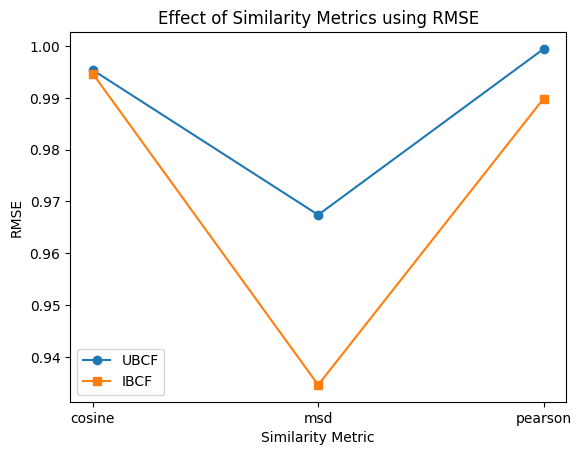

In [89]:
plt.plot(similarities, ubcf_rmse, marker='o', label='UBCF')
plt.plot(similarities, ibcf_rmse, marker='s', label='IBCF')
plt.xlabel("Similarity Metric")
plt.ylabel("RMSE")
plt.title("Effect of Similarity Metrics using RMSE")
plt.legend()
plt.show()

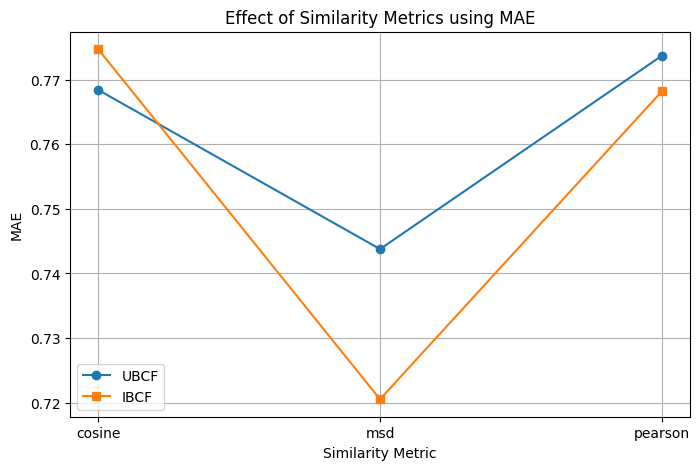

In [90]:
plt.figure(figsize=(8, 5))
plt.plot(similarities, ubcf_mae, marker='o', label='UBCF')
plt.plot(similarities, ibcf_mae, marker='s', label='IBCF')
plt.xlabel("Similarity Metric")
plt.ylabel("MAE")
plt.title("Effect of Similarity Metrics using MAE")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# TASK 2 (f)

In [92]:
neighbors = [5, 15, 25, 35, 50]
ubcf_rmse_k = []
ubcf_mae_k = []
ibcf_rmse_k = []
ibcf_mae_k = []
# default similarity is msd
for k in neighbors:
    ubcf_k = KNNBasic(k=k, sim_options={'user_based': True})
    temp6 = cross_validate(ubcf_k, data, measures=['RMSE', 'MAE'], cv=5)
    ubcf_rmse_k.append(np.mean(temp6['test_rmse']))
    ubcf_mae_k.append(np.mean(temp6['test_mae']))

    ibcf_k = KNNBasic(k=k, sim_options={'user_based': False})
    temp7 = cross_validate(ibcf_k, data, measures=['RMSE', 'MAE'], cv=5)
    ibcf_rmse_k.append(np.mean(temp7['test_rmse']))
    ibcf_mae_k.append(np.mean(temp7['test_mae']))
print("COMPLETED EXECUTE NEXT CELL")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [93]:
print("K-values:", neighbors)
print("User-based CF RMSE:", ubcf_rmse_k)
print("User-based CF MAE: ", ubcf_mae_k)
print("Item-based CF RMSE:", ibcf_rmse_k)
print("Item-based CF MAE: ", ibcf_mae_k)

K-values: [5, 15, 25, 35, 50]
User-based CF RMSE: [0.9848274249846252, 0.9624214749351176, 0.9641947038478562, 0.9667429920915952, 0.9723570215425635]
User-based CF MAE:  [0.7536289749025804, 0.7365444403671588, 0.7389166125178639, 0.7427889573474672, 0.7480538648454859]
Item-based CF RMSE: [1.0225711388741021, 0.9569955292891196, 0.9403678093596938, 0.9364375147452163, 0.9331331316374]
Item-based CF MAE:  [0.7912507701415565, 0.7398265719990631, 0.7264076922338284, 0.7223557632389661, 0.7193272211139555]


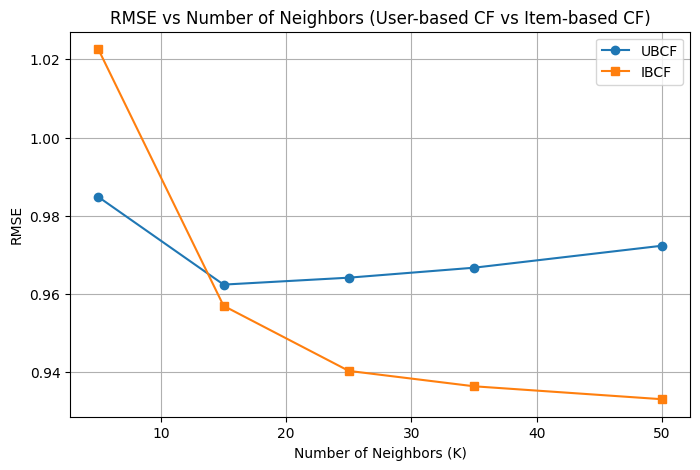

In [94]:
plt.figure(figsize=(8,5))
plt.plot(neighbors, ubcf_rmse_k, marker='o', label='UBCF')
plt.plot(neighbors, ibcf_rmse_k, marker='s', label='IBCF')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of Neighbors (User-based CF vs Item-based CF)")
plt.legend()
plt.grid(True)
plt.show()

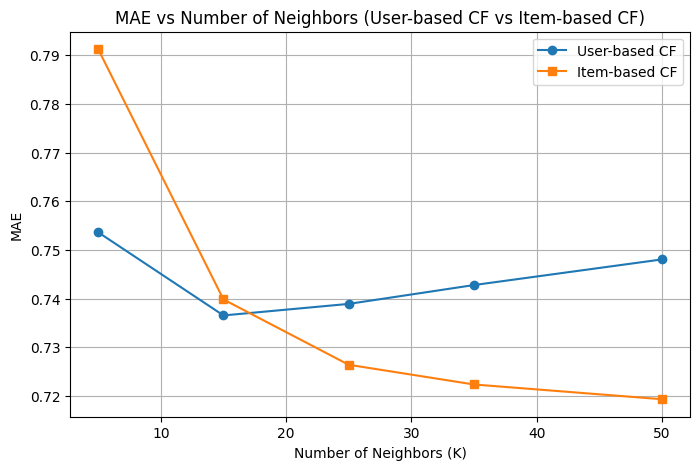

In [95]:
plt.figure(figsize=(8,5))
plt.plot(neighbors, ubcf_mae_k, marker='o', label='User-based CF')
plt.plot(neighbors, ibcf_mae_k, marker='s', label='Item-based CF')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("MAE")
plt.title("MAE vs Number of Neighbors (User-based CF vs Item-based CF)")
plt.legend()
plt.grid(True)
plt.show()